In [621]:
import sklearn as sk
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import chi2

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)

In [622]:
def columnDrop(dataset,category):
    dataset = dataset.drop(columns = category, axis = 1)
    return dataset

In [623]:
def oneHotEncode(dataset,category):
    categoryDataset = pd.get_dummies(dataset[category],prefix = category)
    dataset = pd.concat([dataset,categoryDataset], axis=1)
    dataset = columnDrop(dataset,category)
    #dataset = dataset.drop(columns = [category],axis = 1)
    return dataset

In [624]:
def normalizeCat(dataset,category):
    dataset[category]=((dataset[category]-dataset[category].min())/(dataset[category].max()-dataset[category].min()))*1.0
    return dataset[category]

In [625]:
def columnlist(dataset):
    mylist = list()
    for col in dataset.columns:  
        mylist.append(col)
        
    return mylist

In [626]:
#encoding all strings
def HotEncode(dataset):
    newdataset = oneHotEncode(dataset,'Gender')
    newdataset = oneHotEncode(newdataset,'Country')
    newdataset = oneHotEncode(newdataset,'Profession')
    #newdataset = oneHotEncode(newdataset,'Hair Color')
    newdataset = oneHotEncode(newdataset,'University Degree')
    return newdataset

In [627]:
def normalise(dataset):
    #normalize some columns
    dataset['Year of Record'] = normalizeCat(dataset,'Year of Record')
    dataset['Age'] = normalizeCat(dataset,'Age')
    dataset['Size of City'] = normalizeCat(dataset,'Size of City')
    dataset['Body Height [cm]'] = normalizeCat(dataset,'Body Height [cm]')
    return dataset

In [628]:
dataset = pd.read_csv('./Kaggle1/Data/tcd ml 2019-20 income prediction training (with labels).csv')
NoLabel = pd.read_csv('./Kaggle1/Data/tcd ml 2019-20 income prediction test (without labels).csv')

In [629]:
#dataset[dataset.columns] = dataset[dataset.columns].fillna(dataset.mode().iloc[0])
#NoLabel[NoLabel.columns] = NoLabel[NoLabel.columns].fillna(NoLabel.mode().iloc[0])

In [630]:
dataset= dataset.ffill()
NoLabel= NoLabel.ffill()

In [631]:
Bothsets = pd.concat([dataset, NoLabel], sort=False)
Bothsets = columnDrop(Bothsets,'Hair Color')
Bothsets = columnDrop(Bothsets,'Wears Glasses')


Bothsets = HotEncode(Bothsets)
Bothsets = normalise(Bothsets)

trainset_i = Bothsets['Instance'] < 111994
trainset = Bothsets[trainset_i]

In [632]:
#quantile1 = trainset['Size of City'].quantile(0.99)
#quantile2 = trainset['Size of City'].quantile(0.01)
#trainset = trainset[(trainset['Size of City'] <= quantile1) & (trainset['Size of City'] >= quantile2)]

quantile1 = trainset['Body Height [cm]'].quantile(0.99)
quantile2 = trainset['Body Height [cm]'].quantile(0.01)
trainset = trainset[(trainset['Body Height [cm]'] <= quantile1) & (trainset['Body Height [cm]'] >= quantile2)]

#trainset = trainset[trainset.columns[trainset.sum()>10]]

submissionset_i = Bothsets['Instance'] >= 111994
submissionset = Bothsets[submissionset_i]

In [633]:
#age = trainset.groupby('Age')
#trainset = age.filter(lambda x: len(x) > 50)
#trainset.plot(kind = 'scatter',x='Body Height [cm]',y='Income in EU R')

In [634]:
features = trainset.drop(['Income in EUR','Income','Instance'], axis = 1)
submissionfeatures = submissionset.drop(['Income in EUR','Income','Instance'], axis = 1)

In [635]:
print(features.shape)
print(submissionfeatures.shape)

(109848, 1531)
(73230, 1531)


In [636]:
#labels1 = trainset.drop('Income', axis = 1)
labels = trainset['Income in EUR']
train_labels = np.array(labels)
labels.head()

0     61031.94416
1     91001.32764
2    157982.17670
3     45993.75793
4     38022.16217
Name: Income in EUR, dtype: float64

In [637]:
#bestfeatures = sk.feature_selection.SelectKBest(score_func=chi2,k=10).fit_transform(features,labels)

In [638]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [639]:
X_train.shape

(87878, 1531)

In [640]:
#regressor = LinearRegression()
#model = regressor.fit(X_train,y_train)

In [641]:
#regressor = sk.linear_model.Ridge(alpha = 0.1,)
#model = regressor.fit(X_train,y_train)

In [642]:
#regressor = sk.linear_model.LogisticRegression(verbose = 2)
#model = regressor.fit(X_train,y_train)

In [643]:
#regressor = sk.linear_model.Lasso(alpha = 0.1,max_iter = 500,tol = 0.1)
#model = regressor.fit(X_train,y_train)

In [644]:
#regressor = sk.linear_model.OrthoganalMatchingPursuitCV(cv=5)
#model = regressor.fit(X_train,y_train)

In [645]:
#regressor = sk.linear_model.BayesianRidge()
#model = regressor.fit(X_train,y_train)

In [646]:
#regressor = sk.linear_model.ElasticNet(alpha = 0.1,max_iter = 1000,tol = 0.0001)
#model = regressor.fit(X_train,y_train)

In [659]:
regressor = RandomForestRegressor(n_estimators = 20,verbose = 2, n_jobs = -1)
model = regressor.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 20building tree 2 of 20
building tree 3 of 20

building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  5.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.2min finished


In [682]:
regressor = RandomForestRegressor(n_estimators = 50,verbose = 2, n_jobs = -1)
model = regressor.fit(features,labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.0min


building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 24.0min finished


In [683]:
#regressor = sk.ensemble.GradientBoostingRegressor(random_state=0,n_estimators = 200,learning_rate = 0.5,loss = 'ls')
#model = regressor.fit(X_train,y_train)

In [684]:
#regressor = sk.ensemble.GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.3, max_depth = 3, random_state = 0, loss = 'ls')
#model = regressor.fit(features,labels)

In [685]:
#regressor = sk.linear_model.Lars()
#model = regressor.fit(X_train,y_train)

In [686]:
#coeff = pd.DataFrame(regressor.coef_, temp.columns,columns = ['Coefficient'])
#coeff
model2=model

In [693]:
y_pred = model2.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished


(0, 1000000)

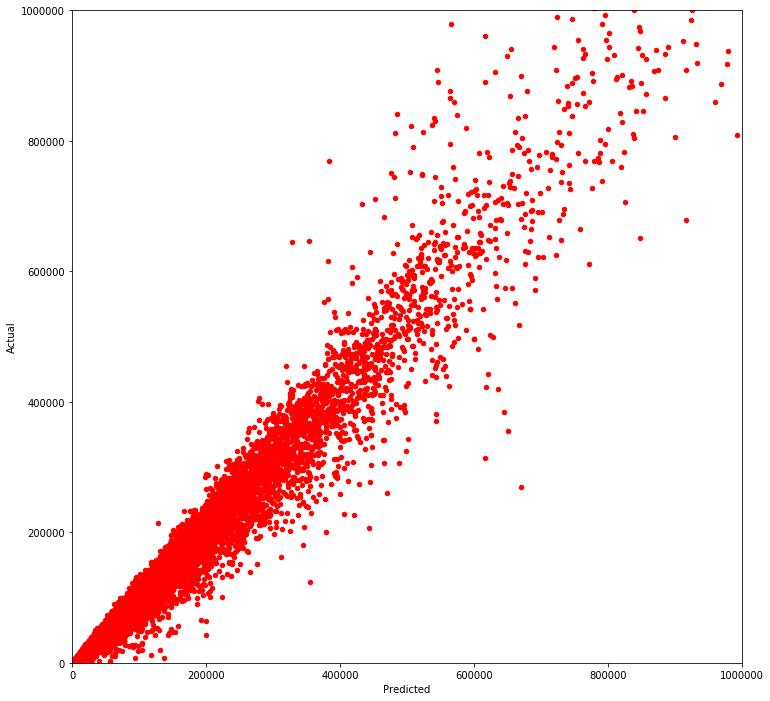

In [694]:
diff = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
plot1 = diff.plot(kind='scatter',x='Predicted',y='Actual',color='red')
plot1.set_ylim(0,1000000)
plot1.set_xlim(0,1000000)

In [689]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 31535.75481773434


In [690]:
test_labels = model.predict(submissionfeatures)
print(test_labels)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.5s


[ 69364.7925422  18022.3279912  37752.0080156 ...  60312.1018952
 197861.1614856 201759.334008 ]


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.9s finished


In [691]:
test_labels.shape

(73230,)

In [692]:
submission_data = pd.read_csv('./Kaggle1/Data/tcd ml 2019-20 income prediction submission file.csv')
print(submission_data.shape)
submission_data['Income'] = test_labels
submission_data.to_csv('./Kaggle1/Data/tcd ml 2019-20 income prediction submission file.csv', encoding='utf-8', index = False)

(73230, 2)
